**(1) To evaluate the impact of the fitness function in terms of prediction quality and tree size for traditional GSGP.**

Experimental Setup:

10 (will be 30 for the final version) Monte Carlo Runs for 18 Datasets with the fixed configurations:


config_all = {

    'pop_size': 50, #will be 200 for final version
    'n_iter': 300,  #will be 2000 for final version
    'elitism': True,
    'n_elites': 1,
    'init_depth': 6,
    'initializer': 'rhh',
    'tournament_size': 2,
    'prob_const': 0.2,
    'tree_functions': ['add', 'subtract', 'multiply', 'divide'],
    'tree_constants': np.linspace(-10, 10, num=201).round(1).tolist(),
    'fitness_function': sigmoid_rmse,
    'minimization' : True,
    'seed': None, #based on monte_carlo_run
    'log_path' : None, #based on monte_carlo_run
    'verbose': False,
    'log_level': 0,
    'test_elite': True

}

basic_config_slim= {

    'slim_version': None, #for all versions
    'ms_lower': 0,
    'ms_upper': 1,
    'p_inflate': [0.1, 0.3, 0.5, 0.7, 0.9],
    'reconstruct': True,
    'copy_parent': True

}


In [1]:
import sys
import os
sys.path.insert(0, os.path.abspath("../"))
from analysis import *
import numpy as np

In [2]:
%%capture
ana_fitness = FitnessAnalysis('RQ_Fitness')

In [3]:
ana_fitness.wtl_1v1

Metric,Fitness Function,Accuracy,F1-Score,ROC-AUC,Tree Size
0,Accuracy vs F1-Score,3-7-0,0-8-2,0-8-2,0-9-1
1,Accuracy vs RMSE,0-3-7,1-3-6,0-2-8,10-0-0
2,Accuracy vs WRMSE,4-4-2,0-5-5,1-2-7,10-0-0
3,F1-Score vs RMSE,0-3-7,1-4-5,0-5-5,10-0-0
4,F1-Score vs WRMSE,4-3-3,0-5-5,1-3-6,10-0-0
5,RMSE vs WRMSE,5-5-0,2-5-3,0-9-1,0-10-0


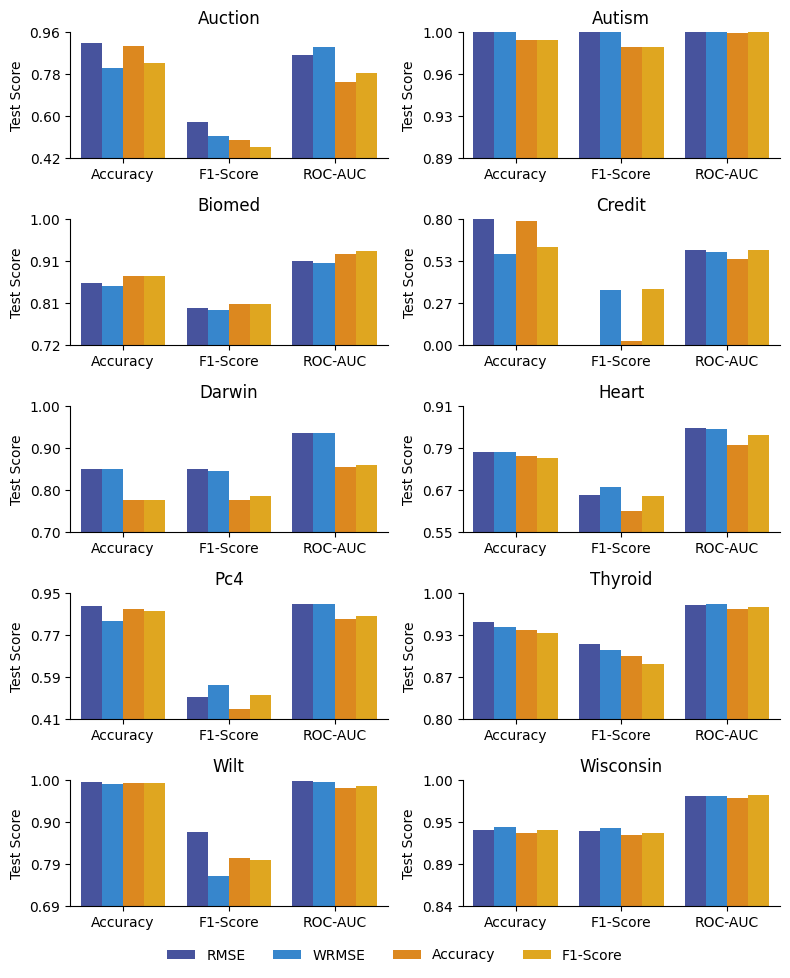

In [4]:
ana_fitness.performance_plot[0]

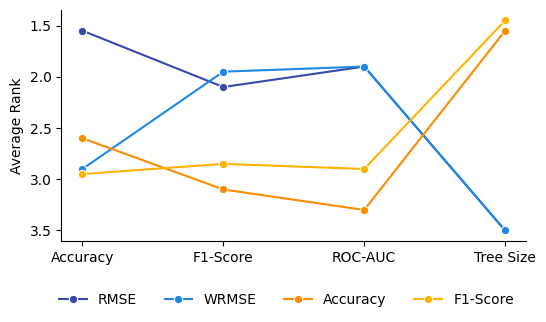

In [5]:
ana_fitness.ranks_plot[0]

In [6]:
ana_fitness.friedman_pvalues

,Metric,P-Value,Significant
0,Accuracy,0.010763,Yes
1,F1-Score,0.009144,Yes
2,ROC-AUC,0.003604,Yes
3,Tree Size,0.000002,Yes


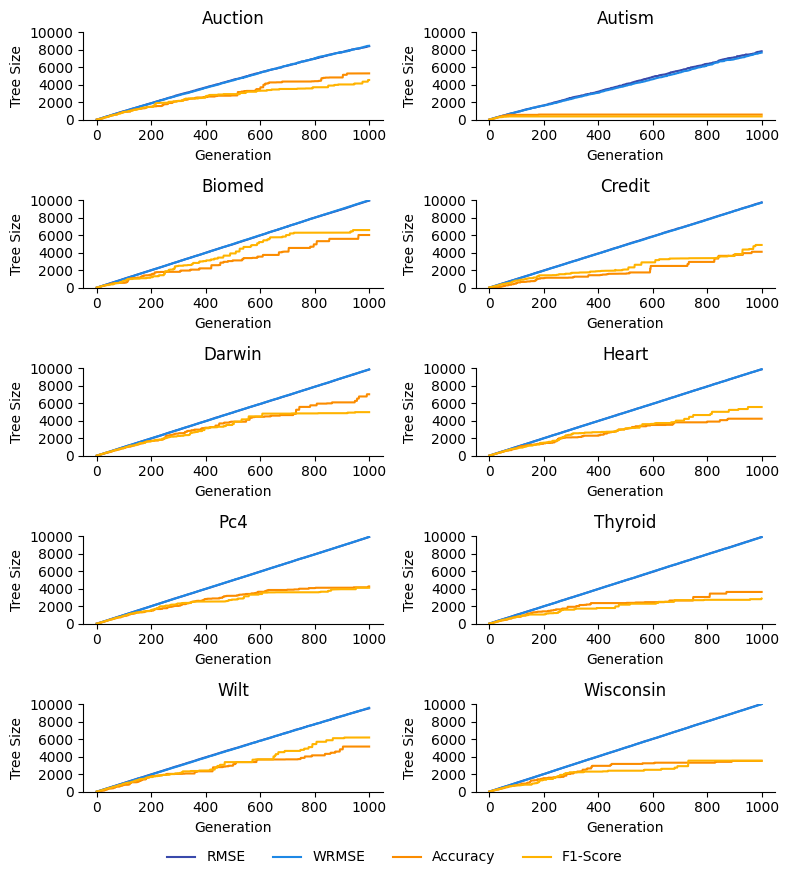

In [7]:
ana_fitness.tree_size_evolution_plot[0]

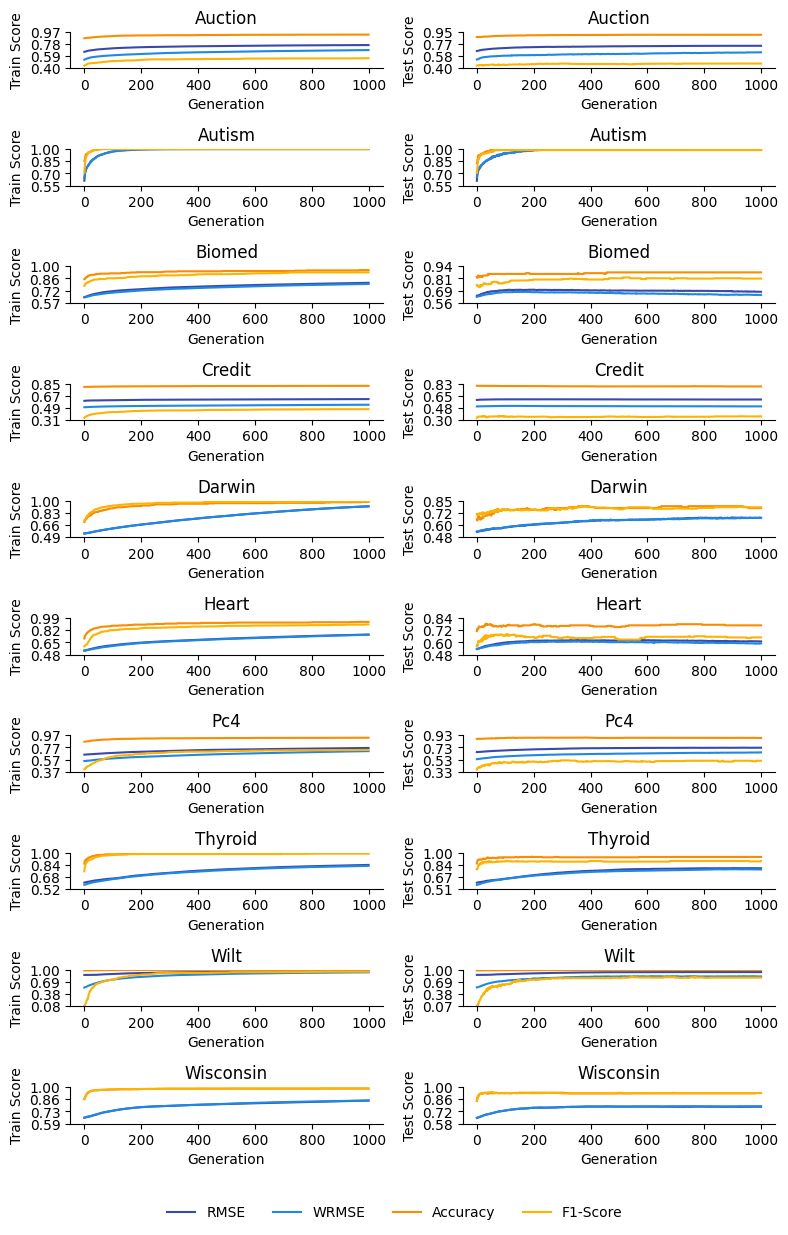

In [8]:
ana_fitness.performance_evolution_plot[0]

In [15]:
get_wilcoxon_rank_pvalues(ana_fitness.wtl_detailed, 'config.fitness_function')

c:\Users\leond\AppData\Local\Programs\Python\Python311\Lib\site-packages\scipy\stats\_morestats.py:4088: UserWarning: Exact p-value calculation does not work if there are zeros. Switching to normal approximation.
  warnings.warn("Exact p-value calculation does not work if there are "
c:\Users\leond\AppData\Local\Programs\Python\Python311\Lib\site-packages\scipy\stats\_morestats.py:4102: UserWarning: Sample size too small for normal approximation.
  warnings.warn("Sample size too small for normal approximation.")


,metric,config.fitness_function_1,config.fitness_function_2,p_value,significant
0,test.accuracy,accuracy,f1_score,0.058782,False
1,test.accuracy,accuracy,sigmoid_rmse,0.016351,True
2,test.accuracy,accuracy,weighted_sigmoid_rmse,0.598725,False
3,test.accuracy,f1_score,accuracy,0.058782,False
4,test.accuracy,f1_score,sigmoid_rmse,0.008386,True
5,test.accuracy,f1_score,weighted_sigmoid_rmse,0.795883,False
6,test.accuracy,sigmoid_rmse,accuracy,0.016351,True
7,test.accuracy,sigmoid_rmse,f1_score,0.008386,True
8,test.accuracy,sigmoid_rmse,weighted_sigmoid_rmse,0.040479,True
9,test.accuracy,weighted_sigmoid_rmse,accuracy,0.598725,False


In [9]:
ana_fitness.results['algorithm'].unique()

array(['GSGP'], dtype=object)

In [10]:
ana_fitness.perform

AttributeError: 'FitnessAnalysis' object has no attribute 'perform'

In [11]:
ana_fitness.best_config_results.loc[ana_fitness.best_config_results['dataset'] == 'Auction'][['test.f1_score', 'algorithm', 'fitness_function']]

,test.f1_score,algorithm,fitness_function
0,0.500000,GSGP,sigmoid_rmse
1,0.589147,GSGP,sigmoid_rmse
2,0.513761,GSGP,sigmoid_rmse
3,0.635659,GSGP,sigmoid_rmse
4,0.547009,GSGP,sigmoid_rmse
...,...,...,...
115,0.454106,GSGP,f1_score
116,0.393782,GSGP,f1_score
117,0.413146,GSGP,f1_score
118,0.532020,GSGP,f1_score


In [ ]:
    import scipy.stats as stats
stats.wilcoxon(ana_fitness.best_config_results.loc[(ana_fitness.best_config_results['dataset'] == 'Wilt') & ((ana_fitness.best_config_results['fitness_function'] == 'sigmoid_rmse'))]['test.f1_score'],
               ana_fitness.best_config_results.loc[(ana_fitness.best_config_results['dataset'] == 'Wilt') & ((ana_fitness.best_config_results['fitness_function'] == 'weighted_sigmoid_rmse'))]['test.f1_score'])

WilcoxonResult(statistic=8.0, pvalue=0.1953125)